In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
def get_metrics_lists(lines):
    model_names = [lines[0][:-1],lines[5][0:-1],lines[10][0:-1]]
    mse = [lines[1].split(":")[1][:-1],lines[6].split(":")[1][:-1],lines[11].split(":")[1][:-1]]
    wape = [lines[2].split(":")[1][:-1],lines[7].split(":")[1][:-1],lines[12].split(":")[1][:-1]]
    r2 = [lines[3].split(":")[1][:-1],lines[8].split(":")[1][:-1],lines[13].split(":")[1][:-1]]
    mse = list(map(float, mse))
    wape = list(map(float, wape))
    wape = list(map(lambda x: x/100, wape))
    r2 = list(map(float, r2))
    return model_names, mse, wape, r2

In [11]:
def get_ml_metrics(lines):
    model_names = [lines[0][:-1], lines[4][0:-1]]
    mse = [lines[1].split(":")[1][:-1],lines[5].split(":")[1][:-1]]
    wape = [lines[2].split(":")[1][:-1],lines[6].split(":")[1][:-1]]
    r2 = [lines[3].split(":")[1][:-1],lines[7].split(":")[1][:-1]]
    mse = list(map(float, mse))
    wape = list(map(float, wape))
    r2 = list(map(float, r2))
    return model_names, mse, wape, r2

In [12]:
def show_graphic(lines, lines_noml, title, filename):
    no_ml, mse_no, wape_no, r2_no = get_ml_metrics(lines_noml)
    model_names, mse, wape, r2 = get_metrics_lists(lines)
    X_names = ['MSE', 'WAPE', 'R2']
    X_axis = np.arange(len(X_names))
    bar_width = 0.15
    fig, ax = plt.subplots()
    bar1 = (mse_no[0], wape_no[0], r2_no[0])
    bar2 = (mse[0], wape[0], r2[0])
    bar3 = (mse[1], wape[1], r2[1])
    bar4 = (mse[2], wape[2], r2[2])
    b1 = ax.bar(X_axis, bar1, bar_width-0.01, label=no_ml[0])
    b2 = ax.bar(X_axis + bar_width, bar2, bar_width-0.01, label=model_names[0])
    b3 = ax.bar(X_axis + bar_width*2, bar3, bar_width-0.01, label=model_names[1])
    b4 = ax.bar(X_axis + bar_width*3, bar4, bar_width-0.01, label=model_names[2])
    ax.bar_label(b1, fontsize=6, fmt='%.3f')
    ax.bar_label(b2, fontsize=6, fmt='%.3f')
    ax.bar_label(b3, fontsize=6, fmt='%.3f')
    ax.bar_label(b4, fontsize=6, fmt='%.3f')
    #ax.bar_label((mse_no[0], wape_no[0], r2_no[0]))
    ax.set_ylim(0,1)
    ax.set_xticks(X_axis+bar_width+bar_width/2,X_names)
    ax.set_xlabel("Model Comparison")
    ax.set_ylabel("Metrics")
    ax.set_title(title)
    ax.legend()
    plt.savefig(filename)
    plt.show()

In [13]:
with open('gpu_logs/no_ml.txt') as f:
    lines_noml = f.readlines()
lines_noml = lines_noml[1:9]
lines_noml

['No_ML\n',
 'MSE: 0.2223\n',
 'WAPE: 0.3078\n',
 'R2: 0.7108\n',
 'No_ML_Aggregated\n',
 'MSE: 0.0051\n',
 'WAPE: 0.22\n',
 'R2: 0.6776\n']

In [ ]:
with open('gpu_logs/ensemble_porto.txt') as f:
    lines = f.readlines()
lines_porto = lines[-14:]
lines_porto

In [14]:
with open('gpu_logs/ensemble_porto_40best.txt') as f:
    lines = f.readlines()
lines_porto_40 = lines[-14:]
lines_porto_40

['Linear Regression\n',
 'Total Averaged MSE: 0.201\n',
 'Total Averaged WAPE: 30.838\n',
 'Total Averaged R2: 0.776\n',
 '\n',
 'XGBoost\n',
 'Total Averaged MSE: 0.364\n',
 'Total Averaged WAPE: 30.024\n',
 'Total Averaged R2: 0.736\n',
 '\n',
 'Random Forest\n',
 'Total Averaged MSE: 0.341\n',
 'Total Averaged WAPE: 27.709\n',
 'Total Averaged R2: 0.769\n']

In [6]:
with open('gpu_logs/shared_40best.txt') as f:
    lines = f.readlines()
lines_shared_40 = lines[-14:]
lines_shared_40

['Linear Regression\n',
 'Total Averaged MSE: 0.067\n',
 'Total Averaged WAPE: 44.235\n',
 'Total Averaged R2: 0.62\n',
 '\n',
 'XGBoost\n',
 'Total Averaged MSE: 0.07\n',
 'Total Averaged WAPE: 44.142\n',
 'Total Averaged R2: 0.6\n',
 '\n',
 'Random Forest\n',
 'Total Averaged MSE: 0.07\n',
 'Total Averaged WAPE: 47.041\n',
 'Total Averaged R2: 0.6\n']

In [7]:
with open('gpu_logs/coopernico_97.txt') as f:
    lines = f.readlines()
lines = lines[-14:]
lines

['Linear Regression\n',
 'Total Averaged MSE: 33.14\n',
 'Total Averaged WAPE: 24.333\n',
 'Total Averaged R2: 0.898\n',
 '\n',
 'XGBoost\n',
 'Total Averaged MSE: 53.225\n',
 'Total Averaged WAPE: 30.717\n',
 'Total Averaged R2: 0.842\n',
 '\n',
 'Random Forest\n',
 'Total Averaged MSE: 45.387\n',
 'Total Averaged WAPE: 27.649\n',
 'Total Averaged R2: 0.859\n']

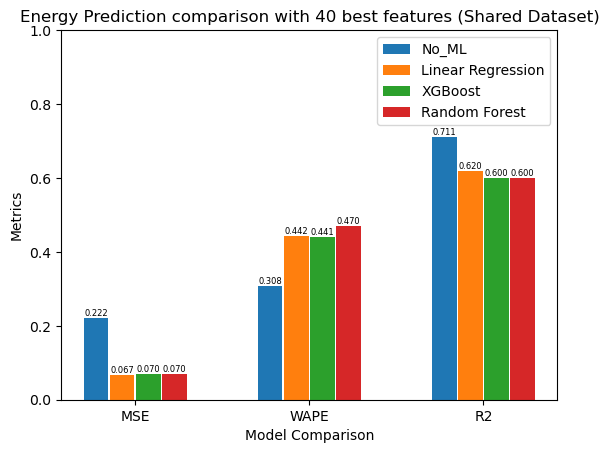

In [7]:
show_graphic(lines_shared_40, lines_noml, "Energy Prediction comparison with 40 best features (Shared Dataset)", 'images/model_comparison_shared_40best.png')

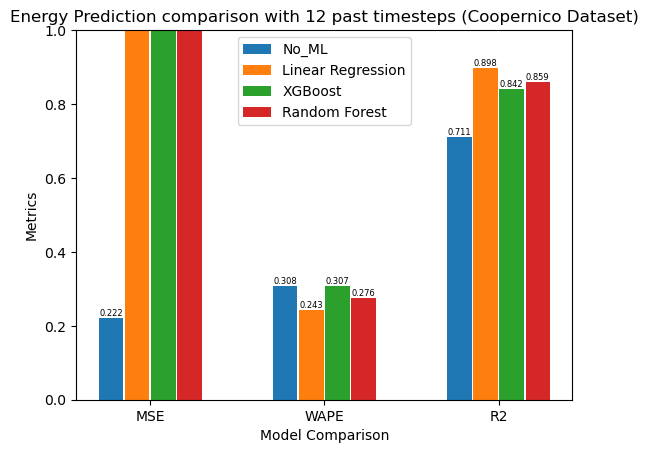

In [8]:
show_graphic(lines, lines_noml, "Energy Prediction comparison with 12 past timesteps (Coopernico Dataset)", 'images/model_comparison_coopernico.png')

In [71]:
with open('gpu_logs/ensemble_our.txt') as f:
    lines_our = f.readlines()
lines_our = lines_our[-14:]
lines_our

['Linear Regression\n',
 'Total Averaged MSE: 0.072\n',
 'Total Averaged WAPE: 42.216\n',
 'Total Averaged R2: 0.519\n',
 '\n',
 'XGBoost\n',
 'Total Averaged MSE: 0.075\n',
 'Total Averaged WAPE: 40.76\n',
 'Total Averaged R2: 0.498\n',
 '\n',
 'Random Forest\n',
 'Total Averaged MSE: 0.075\n',
 'Total Averaged WAPE: 43.0\n',
 'Total Averaged R2: 0.493\n']

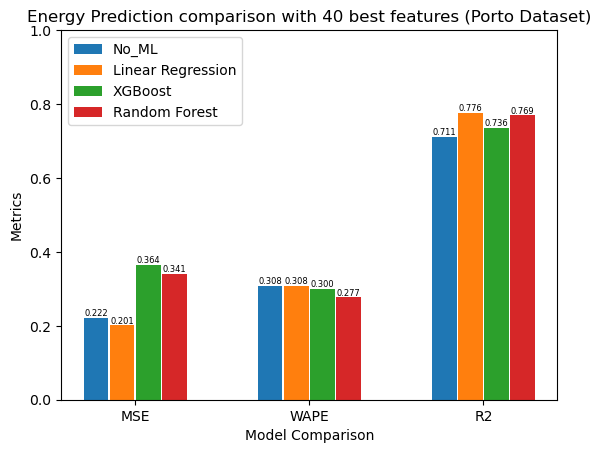

In [15]:
show_graphic(lines_porto_40, lines_noml, "Energy Prediction comparison with 40 best features (Porto Dataset)", 'images/model_comparison_porto_40best.png')

In [74]:
with open('gpu_logs/ensemble_97.txt') as f:
    lines_97 = f.readlines()
lines_97 = lines_97[-14:]
lines_97

['Linear Regression\n',
 'Total Averaged MSE: 0.185\n',
 'Total Averaged WAPE: 32.271\n',
 'Total Averaged R2: 0.757\n',
 '\n',
 'XGBoost\n',
 'Total Averaged MSE: 0.157\n',
 'Total Averaged WAPE: 29.454\n',
 'Total Averaged R2: 0.796\n',
 '\n',
 'Random Forest\n',
 'Total Averaged MSE: 0.142\n',
 'Total Averaged WAPE: 27.526\n',
 'Total Averaged R2: 0.818\n']

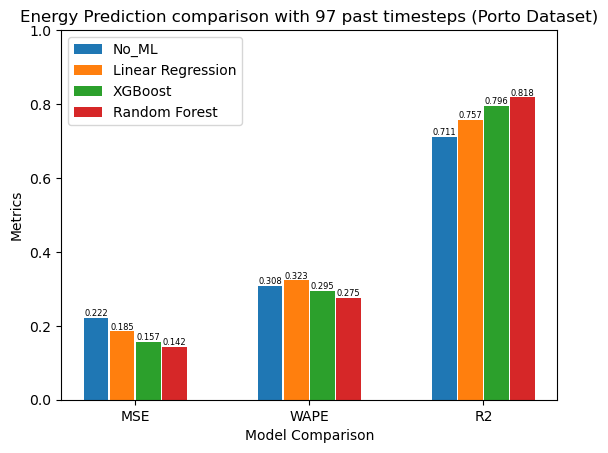

In [75]:
show_graphic(lines_97, lines_noml, "Energy Prediction comparison with 97 past timesteps (Porto Dataset)", 'images/model_comparison_97.png')

In [76]:
with open('gpu_logs/ensemble_our_97.txt') as f:
    lines_our_97 = f.readlines()
lines_our_97 = lines_our_97[-14:]
lines_our_97

['Linear Regression\n',
 'Total Averaged MSE: 0.07\n',
 'Total Averaged WAPE: 39.721\n',
 'Total Averaged R2: 0.54\n',
 '\n',
 'XGBoost\n',
 'Total Averaged MSE: 0.077\n',
 'Total Averaged WAPE: 41.631\n',
 'Total Averaged R2: 0.49\n',
 '\n',
 'Random Forest\n',
 'Total Averaged MSE: 0.075\n',
 'Total Averaged WAPE: 43.57\n',
 'Total Averaged R2: 0.502\n']

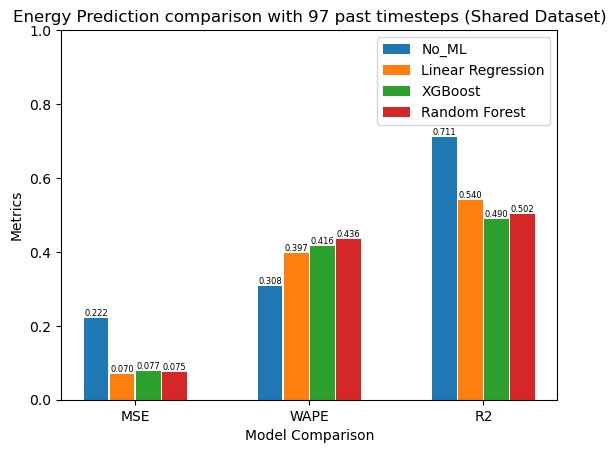

In [77]:
show_graphic(lines_our_97, lines_noml_our, "Energy Prediction comparison with 97 past timesteps (Shared Dataset)", 'images/model_comparison_97_our.png')